In [ ]:
# following stenum et al steps to ID gait events from horizontal/saggital videos 

# Gait event detection

Stenum et al Method for event detection
- note: they used more filtering, scaling, etc steps before that I would need to add. This just for practice 

## Saggital videos 

Stenum et al: *Sagittal videos - We identified left and right heel-strikes and toe-offs as the positive and negative peaks,
respectively, of the **horizontal trajectories** of the left or right ankle keypoints relative to
the mid-hip keypoint.*

For now, I will use right hip and left hip. TBD on if mid-hip marker would be useful...

In [40]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import os

## Load and view MediaPipe data 

In [2]:
# read .csv file 
    # folder organization 
    #PoseEstimationPractice
        #code in one subfolder 
        #.csv file to read in folder ame data_output_csv

        
# horizontal = saggital 
df_mp = pd.read_csv('..\data_output_csv\gait_horizontal_left_mediapipe_0.csv')


# rename columns 
list(df_mp.columns)
df_mp = df_mp.rename(columns = {'Unnamed: 0':'label_num'})
df_mp.head()

,label_num,X,Y,Z,vis,pres,frame,label
0,0,367.261290,739.593503,-0.632737,0.998993,0.0,0,nose
1,1,356.884859,719.147816,-0.541763,0.998115,0.0,0,left_eye_inner
2,2,355.202840,718.922406,-0.542229,0.997278,0.0,0,left_eye
3,3,353.040587,718.605607,-0.542481,0.998061,0.0,0,left_eye_outer
4,4,352.153080,719.925722,-0.771942,0.998750,0.0,0,right_eye_inner


### select all rows for right ankle, left ankle, right hip, and left hip

In [3]:
#27 left ankle, 28 right ankle, 23 left hip, 24 right hip 
hip_ank_df = df_mp.loc[(df_mp['label_num'] == 27) | (df_mp['label_num'] == 28) | 
                     (df_mp['label_num'] == 23) | (df_mp['label_num'] == 24)] 
hip_ank_df.head()

,label_num,X,Y,Z,vis,pres,frame,label
23,23,333.736837,1133.957252,0.574850,0.991795,0.0,0,left_hip
24,24,279.161684,1134.926041,-0.574754,0.995321,0.0,0,right_hip
27,27,292.588416,1541.159268,1.527480,0.470343,0.0,0,left_ankle
28,28,270.470275,1560.194253,0.437566,0.773864,0.0,0,right_ankle
56,23,339.021038,1134.474405,0.527815,0.991788,0.0,1,left_hip


### Plot hip and ankle markers for all frames

Text(0.5, 1.0, 'Hip and Ankle Labels')

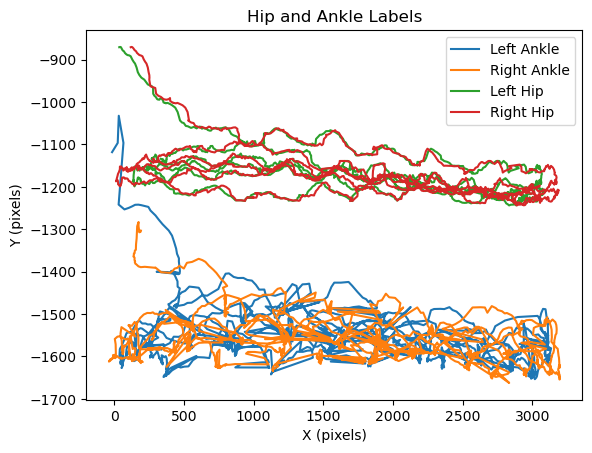

In [4]:
# Plot left ankle path -think looking down, z axis is floor 
hip_l_df = hip_ank_df.loc[(hip_ank_df['label_num'] == 23)]
hip_r_df = hip_ank_df.loc[(hip_ank_df['label_num'] == 24)]
ank_l_df = hip_ank_df.loc[(hip_ank_df['label_num'] == 27)]
ank_r_df = hip_ank_df.loc[(hip_ank_df['label_num'] == 28)]

plt.plot(ank_l_df['X'], -ank_l_df['Y'], label = 'Left Ankle')
plt.plot(ank_r_df['X'], -ank_r_df['Y'], label = 'Right Ankle')
plt.plot(hip_l_df['X'], -hip_l_df['Y'], label = 'Left Hip')
plt.plot(hip_r_df['X'], -hip_l_df['Y'], label = 'Right Hip')

plt.xlabel("X (pixels)")
plt.ylabel("Y (pixels)")
plt.legend(loc = 'best')
plt.title('Hip and Ankle Labels')

In [47]:
# view hip and ank data frames 

print(hip_l_df.shape)
print(hip_r_df.shape)
print(ank_l_df.shape)
print(ank_r_df.shape)

print(hip_l_df.dtypes)
print(hip_r_df.dtypes)
print(ank_l_df.dtypes)
print(ank_r_df.dtypes)

print(ank_l_df.head())
print(hip_l_df.head())
print(ank_r_df.head())
print(hip_r_df.head())

(1915, 8)
(1915, 8)
(1915, 8)
(1915, 8)
label_num      int64
X            float64
Y            float64
Z            float64
vis          float64
pres         float64
frame          int64
label         object
dtype: object
label_num      int64
X            float64
Y            float64
Z            float64
vis          float64
pres         float64
frame          int64
label         object
dtype: object
label_num      int64
X            float64
Y            float64
Z            float64
vis          float64
pres         float64
frame          int64
label         object
dtype: object
label_num      int64
X            float64
Y            float64
Z            float64
vis          float64
pres         float64
frame          int64
label         object
dtype: object
   label_num           X            Y         Z       vis  pres  frame  \
0         27  292.588416  1541.159268  1.527480  0.470343   0.0      0   
1         27  292.276470  1544.133174  1.123815  0.482002   0.0      1   
2         

In [48]:
# update index column so values will subtract (probably better way to do this?)
ank_l_df.index = np.arange(0, len(ank_l_df))
hip_l_df.index = np.arange(0, len(hip_l_df))
ank_r_df.index = np.arange(0, len(ank_r_df))
hip_r_df.index = np.arange(0, len(hip_r_df))

print(ank_l_df.head())
print(hip_l_df.head())
print(ank_r_df.head())
print(hip_r_df.head())

   label_num           X            Y         Z       vis  pres  frame  \
0         27  292.588416  1541.159268  1.527480  0.470343   0.0      0   
1         27  292.276470  1544.133174  1.123815  0.482002   0.0      1   
2         27  293.270236  1545.514246  1.072392  0.492803   0.0      2   
3         27  298.338089  1546.461853  1.094757  0.503286   0.0      3   
4         27  296.842651  1546.642951  1.092595  0.507008   0.0      4   

        label  
0  left_ankle  
1  left_ankle  
2  left_ankle  
3  left_ankle  
4  left_ankle  
   label_num           X            Y         Z       vis  pres  frame  \
0         23  333.736837  1133.957252  0.574850  0.991795   0.0      0   
1         23  339.021038  1134.474405  0.527815  0.991788   0.0      1   
2         23  342.344097  1135.416419  0.514366  0.991978   0.0      2   
3         23  348.375320  1134.764005  0.510975  0.992187   0.0      3   
4         23  350.242081  1135.381589  0.514558  0.992133   0.0      4   

      label  


Text(0.5, 1.0, 'Horizontal Distance Between L Ankle and L Hip')

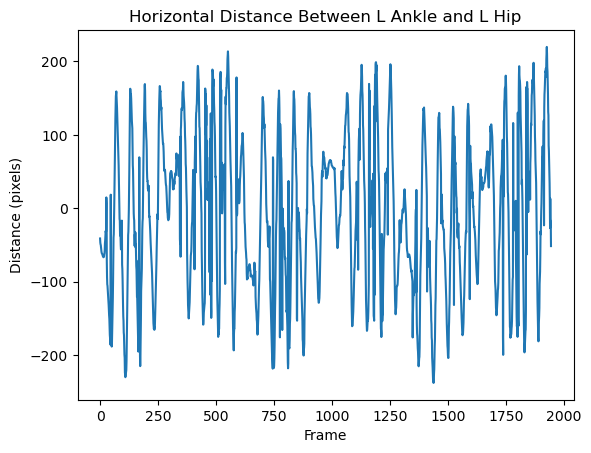

In [56]:
# left ankle and hip plot 
# local max and min = heel strike/toe off 

l_ank_to_hip = ank_l_df.iloc[:,1] - hip_l_df.iloc[:,1]
frame = ank_l_df.iloc[:,6]
plt.plot(frame, l_ank_to_hip)

plt.xlabel("Frame")
plt.ylabel("Distance (pixels)")
plt.title('Horizontal Distance Between L Ankle and L Hip')

# l = localmin/max(left_ankle_x - left_hip_x)